In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [6]:
# Import the requests library.
import requests

#Import the API key
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | cap malheureux
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | wagga wagga
Processing Record 6 of Set 1 | caravelas
Processing Record 7 of Set 1 | mayumba
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | oda
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | sibolga
Processing Record 14 of Set 1 | ola
Processing Record 15 of Set 1 | mount isa
Processing Record 16 of Set 1 | ramhormoz
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | mabaruma
Processing Record 19 of Set 1 | dharchula
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | shizunai
Processing Record 23 of Set 1 | preston
Pro

Processing Record 40 of Set 4 | coquimbo
Processing Record 41 of Set 4 | kozan
Processing Record 42 of Set 4 | belaya gora
Processing Record 43 of Set 4 | tasiilaq
Processing Record 44 of Set 4 | guerrero negro
Processing Record 45 of Set 4 | bereda
Processing Record 46 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 4 | wanning
Processing Record 48 of Set 4 | joshimath
Processing Record 49 of Set 4 | yuanping
Processing Record 50 of Set 4 | yarada
Processing Record 1 of Set 5 | linjiang
Processing Record 2 of Set 5 | yagodnoye
Processing Record 3 of Set 5 | codrington
Processing Record 4 of Set 5 | tecoanapa
Processing Record 5 of Set 5 | nyurba
Processing Record 6 of Set 5 | ust-shonosha
Processing Record 7 of Set 5 | osa
Processing Record 8 of Set 5 | senovo
Processing Record 9 of Set 5 | hihifo
City not found. Skipping...
Processing Record 10 of Set 5 | upata
Processing Record 11 of Set 5 | kamenka
Processing Record 12 of Set 5 | auki
Processing Recor

Processing Record 26 of Set 8 | kualakapuas
Processing Record 27 of Set 8 | port macquarie
Processing Record 28 of Set 8 | aykhal
Processing Record 29 of Set 8 | ipixuna
Processing Record 30 of Set 8 | qidong
Processing Record 31 of Set 8 | daugavpils
Processing Record 32 of Set 8 | san carlos de bariloche
Processing Record 33 of Set 8 | tautira
Processing Record 34 of Set 8 | port elizabeth
Processing Record 35 of Set 8 | alice springs
Processing Record 36 of Set 8 | gusinoye ozero
Processing Record 37 of Set 8 | angarsk
Processing Record 38 of Set 8 | kailua
Processing Record 39 of Set 8 | keetmanshoop
Processing Record 40 of Set 8 | yekaterinoslavka
Processing Record 41 of Set 8 | katakwi
Processing Record 42 of Set 8 | rio gallegos
Processing Record 43 of Set 8 | grindavik
Processing Record 44 of Set 8 | nanortalik
Processing Record 45 of Set 8 | haapu
City not found. Skipping...
Processing Record 46 of Set 8 | abancay
Processing Record 47 of Set 8 | sri aman
Processing Record 48 o

Processing Record 11 of Set 12 | malatya
Processing Record 12 of Set 12 | svetlogorsk
Processing Record 13 of Set 12 | qasigiannguit
Processing Record 14 of Set 12 | muromtsevo
Processing Record 15 of Set 12 | juneau
Processing Record 16 of Set 12 | at-bashi
Processing Record 17 of Set 12 | mangai
Processing Record 18 of Set 12 | warqla
City not found. Skipping...
Processing Record 19 of Set 12 | whitianga
Processing Record 20 of Set 12 | lolua
City not found. Skipping...
Processing Record 21 of Set 12 | san ramon
Processing Record 22 of Set 12 | richard toll
City not found. Skipping...
Processing Record 23 of Set 12 | corner brook
Processing Record 24 of Set 12 | chifeng
Processing Record 25 of Set 12 | phan rang
City not found. Skipping...
Processing Record 26 of Set 12 | praia
Processing Record 27 of Set 12 | kachiry
Processing Record 28 of Set 12 | liancheng
Processing Record 29 of Set 12 | omboue
Processing Record 30 of Set 12 | ullapool
Processing Record 31 of Set 12 | dali
Proce

In [11]:
len(city_data)

554

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,80.94,77,100,16.35,KI,2021-01-30 19:55:33
1,Cape Town,-33.9258,18.4232,72.00,68,20,9.22,ZA,2021-01-30 19:55:33
2,Cap Malheureux,-19.9842,57.6142,79.00,82,0,3.00,MU,2021-01-30 19:55:33
3,Rikitea,-23.1203,-134.9692,78.87,76,3,12.93,PF,2021-01-30 19:55:33
4,Wagga Wagga,-35.1167,147.3667,60.80,88,0,3.44,AU,2021-01-30 19:55:33
5,Caravelas,-17.7125,-39.2481,81.12,68,0,8.70,BR,2021-01-30 19:55:33
6,Mayumba,-3.4320,10.6554,78.82,86,100,3.51,GA,2021-01-30 19:55:33
7,Khatanga,71.9667,102.5000,-45.99,77,26,0.36,RU,2021-01-30 19:55:33
8,Kapaa,22.0752,-159.3190,71.60,94,90,17.27,US,2021-01-30 19:55:33
9,Oda,35.1833,132.5000,44.08,61,10,14.81,JP,2021-01-30 19:55:33


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2021-01-30 19:55:33,3.0707,172.7902,80.94,77,100,16.35
1,Cape Town,ZA,2021-01-30 19:55:33,-33.9258,18.4232,72.00,68,20,9.22
2,Cap Malheureux,MU,2021-01-30 19:55:33,-19.9842,57.6142,79.00,82,0,3.00
3,Rikitea,PF,2021-01-30 19:55:33,-23.1203,-134.9692,78.87,76,3,12.93
4,Wagga Wagga,AU,2021-01-30 19:55:33,-35.1167,147.3667,60.80,88,0,3.44
5,Caravelas,BR,2021-01-30 19:55:33,-17.7125,-39.2481,81.12,68,0,8.70
6,Mayumba,GA,2021-01-30 19:55:33,-3.4320,10.6554,78.82,86,100,3.51
7,Khatanga,RU,2021-01-30 19:55:33,71.9667,102.5000,-45.99,77,26,0.36
8,Kapaa,US,2021-01-30 19:55:33,22.0752,-159.3190,71.60,94,90,17.27
9,Oda,JP,2021-01-30 19:55:33,35.1833,132.5000,44.08,61,10,14.81


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

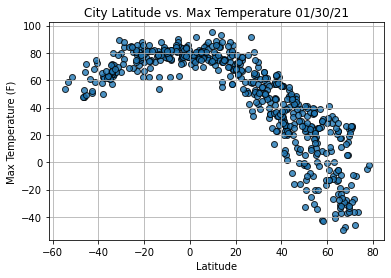

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

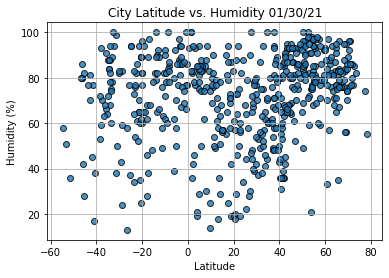

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

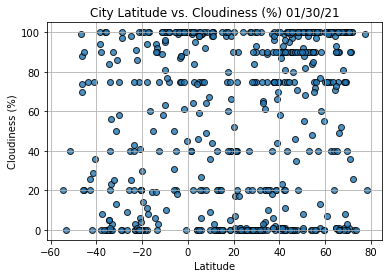

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

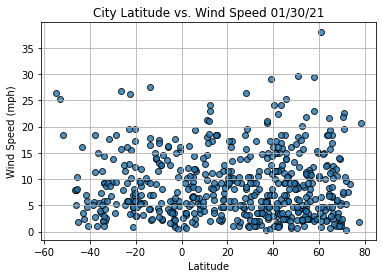

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

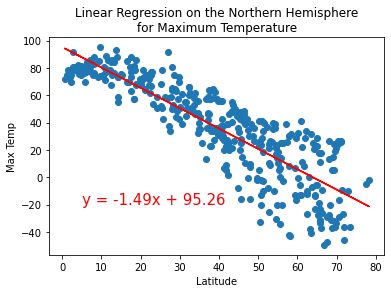

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(5,-20))

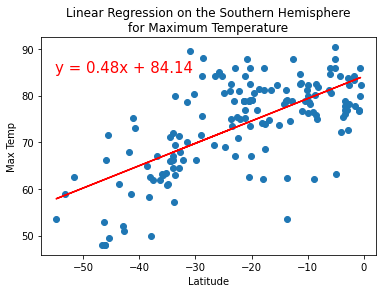

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-55,85))

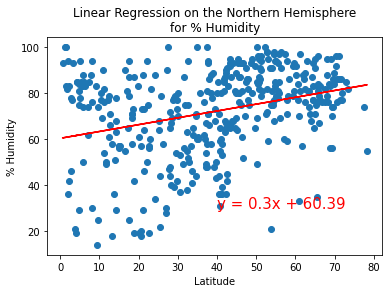

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,30))

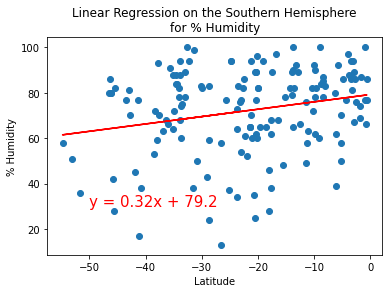

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,30))

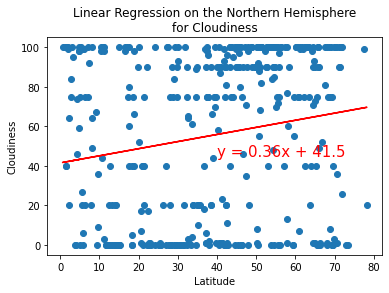

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Cloudiness', 'Cloudiness',(40,45))

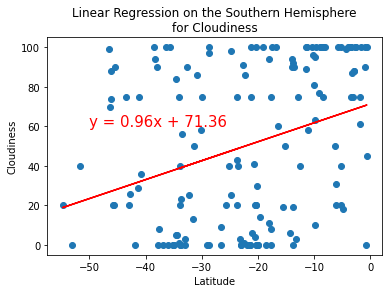

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Cloudiness', 'Cloudiness',(-50,60))

In [31]:
linregress(x_values, y_values)

LinregressResult(slope=0.9579859766857663, intercept=71.35706280907968, rvalue=0.32634375378032376, pvalue=3.215243358130568e-05, stderr=0.22359943682684869)

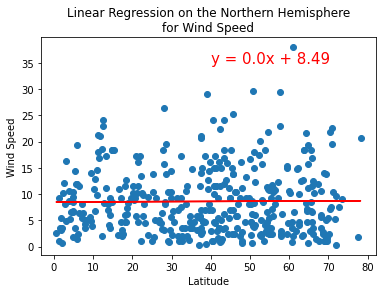

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,35))

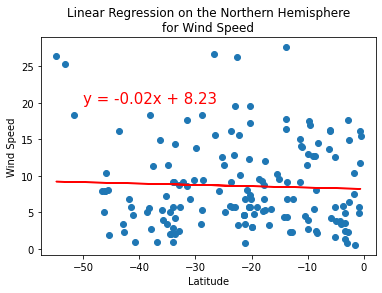

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(-50,20))